<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Drop CustomerID as it's not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

# Handle categorical data (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [5]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

In [6]:
# Elbow method to determine optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

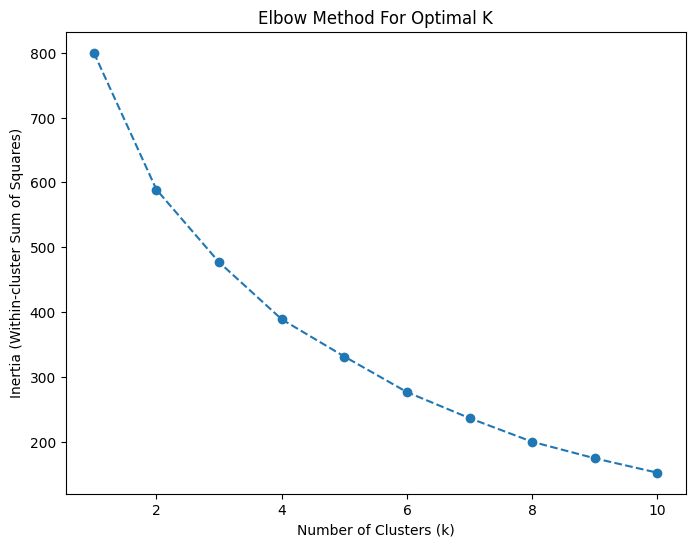

In [7]:
# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


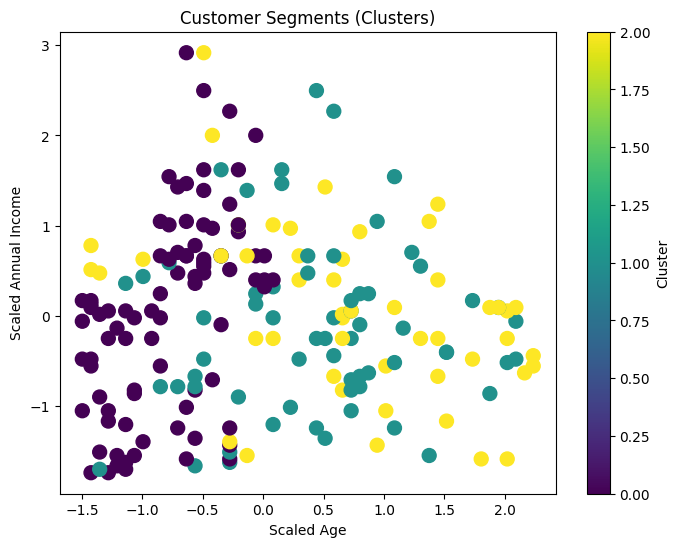

In [9]:
# Optimal k chosen based on the elbow method
optimal_k = 3

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segments (Clusters)')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
# Print cluster centers
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

# Display clustered data
df_clustered = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_clustered)

Cluster Centers (scaled):
[[-0.77529133  0.04688104  0.88056434  0.03792108]
 [ 0.44680201 -0.10812358 -0.5442077  -0.88640526]
 [ 0.74307816  0.06431159 -0.79449512  1.12815215]]
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        0
2     20                  16                       6        1
3     23                  16                      77        0
4     31                  17                      40        1
..   ...                 ...                     ...      ...
195   35                 120                      79        0
196   45                 126                      28        1
197   32                 126                      74        0
198   32                 137                      18        2
199   30                 137                      83        0

[200 rows x 4 columns]


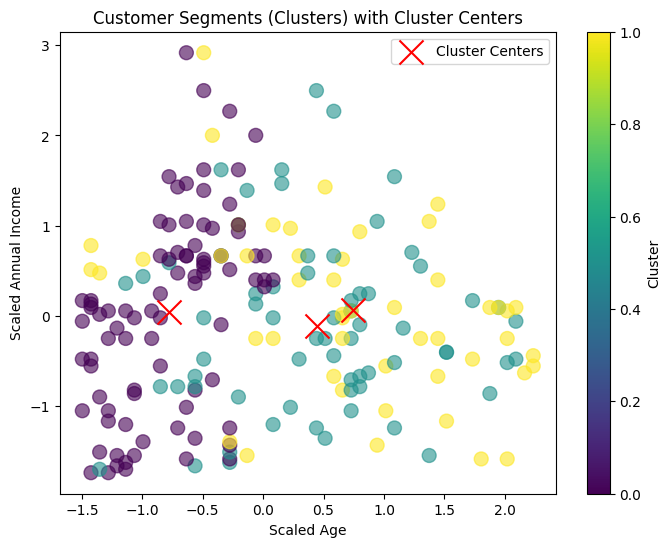

In [11]:
# Scatter plot with cluster centers
plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)
cluster_centers = kmeans.cluster_centers_

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x', label='Cluster Centers')

plt.title('Customer Segments (Clusters) with Cluster Centers')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')

plt.legend()
plt.show()


In [14]:
#Bonus assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Drop CustomerID as it's not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

# Handle categorical data (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

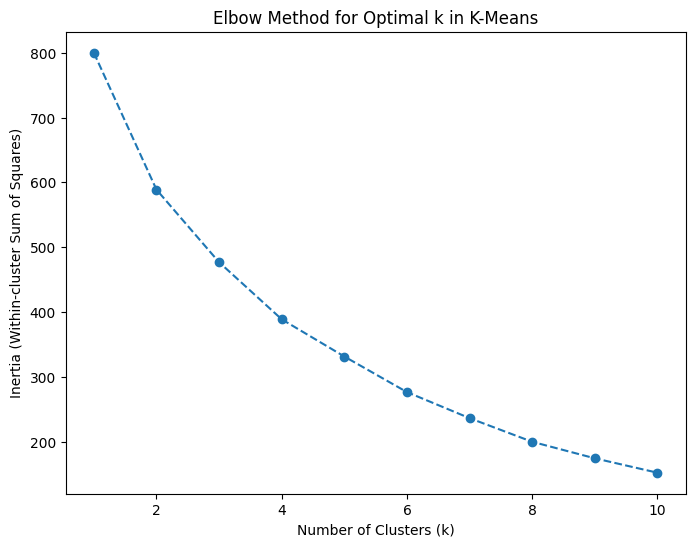

In [15]:
### K-Means Clustering ###
# Determine optimal k using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k in K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

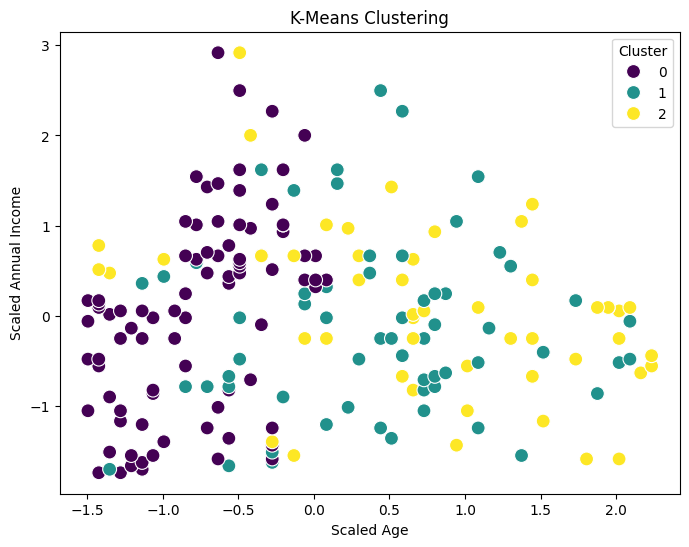

In [16]:
# Choose optimal k based on elbow method
optimal_k = 3  # Adjust based on elbow point

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# K-Means Clustering visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.legend(title="Cluster")
plt.show()


In [17]:
# Compute K-Means Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.2595


DBSCAN found 9 clusters and 105 noise points.


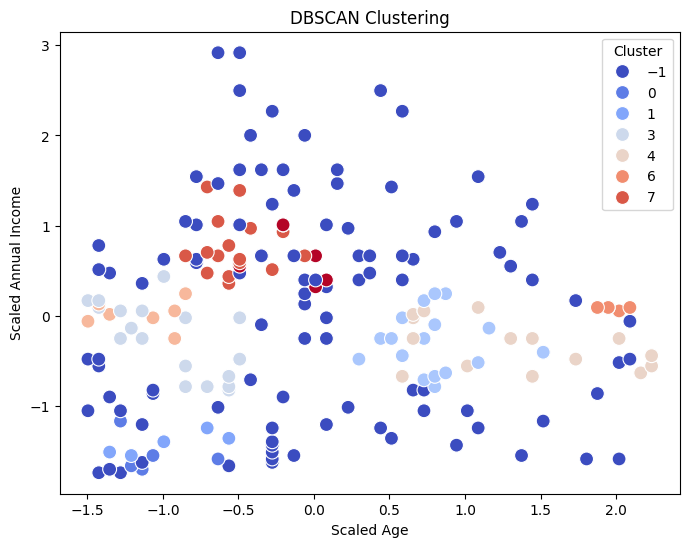

In [18]:
### DBSCAN Clustering ###
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples if needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Count unique clusters (including noise)
unique_clusters = np.unique(df['DBSCAN_Cluster'])
print(f"DBSCAN found {len(unique_clusters) - 1} clusters and {sum(df['DBSCAN_Cluster'] == -1)} noise points.")

# DBSCAN Clustering visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['DBSCAN_Cluster'], palette='coolwarm', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.legend(title="Cluster")
plt.show()

In [19]:
# Compute DBSCAN Silhouette Score (excluding noise points)
valid_clusters = df['DBSCAN_Cluster'] != -1
if valid_clusters.sum() > 1:  # Avoid errors if only noise points exist
    dbscan_silhouette = silhouette_score(df_scaled[valid_clusters], df['DBSCAN_Cluster'][valid_clusters])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    dbscan_silhouette = None
    print("DBSCAN Silhouette Score: Not applicable due to excessive noise.")

DBSCAN Silhouette Score: 0.5395
